In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
#load data
df = pd.read_csv(r"D:\AI\data\Bank_churn_modelling.csv")
df.shape

(10000, 14)

### 1. Data Exploration

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.profile_report()

### 2. Data CLeaning

In [11]:
# check for duplicate entries
df.duplicated().sum()

0

In [12]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 3. Feature Engineering
 - Feature Extraction
 - Feature Selection

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
df.drop(["Surname","RowNumber","CustomerId"],axis=1,inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [71]:
x = df[['CreditScore','Geography', 'Gender',"Age","Balance",
       "NumOfProducts","IsActiveMember"]]
y = df["Exited"]

### 4. Preprocessing

In [72]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [73]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
x["Gender"] = le1.fit_transform(x["Gender"])
x.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,0,42,0.00,1,1
1,608,Spain,0,41,83807.86,1,1
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1


In [74]:
x.head(8)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,0,42,0.00,1,1
1,608,Spain,0,41,83807.86,1,1
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1
5,645,Spain,1,44,113755.78,2,0
6,822,France,1,50,0.00,2,1
7,376,Germany,0,29,115046.74,4,0


In [75]:
# Onehotencoding for geography
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("encoder",OneHotEncoder(),[1])],
                       remainder="passthrough")
x = ct.fit_transform(x)

In [76]:
x.shape

(10000, 9)

In [77]:
x= pd.DataFrame(x)
x.head(10)

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,619.0,0.0,42.0,0.00,1.0,1.0
1,0.0,0.0,1.0,608.0,0.0,41.0,83807.86,1.0,1.0
2,1.0,0.0,0.0,502.0,0.0,42.0,159660.80,3.0,0.0
3,1.0,0.0,0.0,699.0,0.0,39.0,0.00,2.0,0.0
4,0.0,0.0,1.0,850.0,0.0,43.0,125510.82,1.0,1.0
5,0.0,0.0,1.0,645.0,1.0,44.0,113755.78,2.0,0.0
6,1.0,0.0,0.0,822.0,1.0,50.0,0.00,2.0,1.0
7,0.0,1.0,0.0,376.0,0.0,29.0,115046.74,4.0,0.0
8,1.0,0.0,0.0,501.0,1.0,44.0,142051.07,2.0,1.0
9,1.0,0.0,0.0,684.0,1.0,27.0,134603.88,1.0,1.0


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [78]:
# splitting data into train and test set
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)
print(x.shape)
print(xtr.shape)
print(xts.shape)

(10000, 9)
(8000, 9)
(2000, 9)


### 5. Apply ML Algorithm

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
# train the model - using trianing data - xtr , ytr
model.fit(xtr,ytr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 6. Performance Analysis

In [47]:
## France, cs= 580, age=58, Male, numofprod=3,isactmem=0, balance=456782
new_customer=[[1,0,0,580,1,58,456782,3,0]]
model.predict(new_customer)

array([1], dtype=int64)

In [48]:
# check performance of model on test data
# getting prediction for test data
ypred = model.predict(xts)
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.8135

In [49]:
# calcualte recall
metrics.recall_score(yts,ypred)

0.1971153846153846

In [42]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [50]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
ypred2 = model2.predict(xts)
metrics.accuracy_score(yts,ypred2)

0.848

In [52]:
metrics.recall_score(yts,ypred2)

0.4951923076923077

### Decision Tree Algorithm

In [79]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='gini',
                               max_depth=8,min_samples_leaf=50,
                               min_samples_split=100)
# train the model 
model3.fit(xtr,ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [80]:
ypred3 = model3.predict(xts)
metrics.accuracy_score(yts,ypred3)

0.862

In [81]:
metrics.recall_score(yts,ypred3)

0.47368421052631576

In [82]:
metrics.recall_score(ytr,model3.predict(xtr))

0.47807288449660285

In [83]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

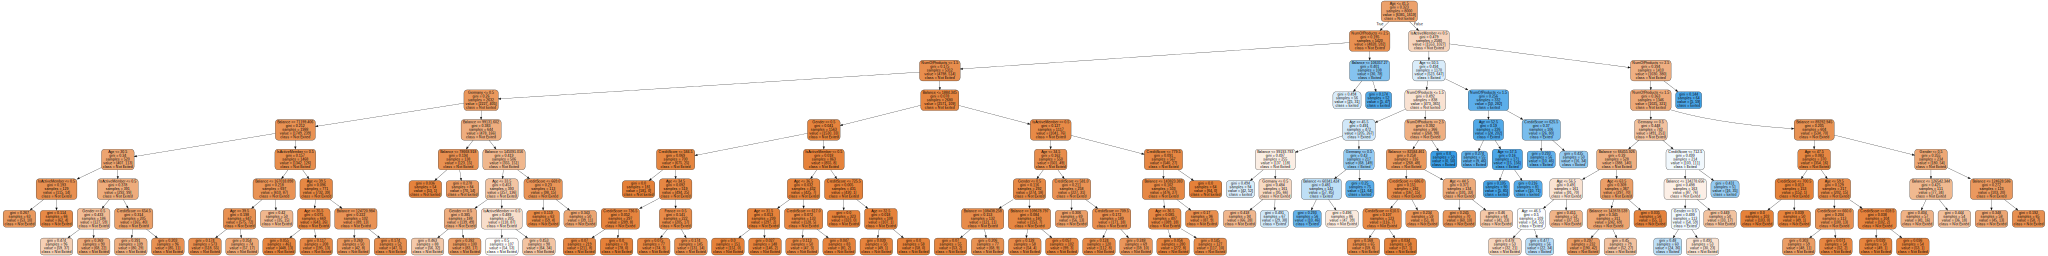

In [84]:
import graphviz
from sklearn import tree
fnames = ['France','Germany','Spain','CreditScore','Gender',
          'Age','Balance','NumOfProducts','IsActiveMember']
cnames =['Not Exited','Exited'] 
graph_data = tree.export_graphviz(model3,out_file=None,
                                 feature_names=fnames,
                                 class_names=cnames,filled=True,
                                 rounded=True)
graph = graphviz.Source(graph_data)
graph

### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=50,criterion='gini',
                               max_depth=10,min_samples_leaf=20)
model4.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
metrics.recall_score(yts,model4.predict(xts))

0.4784688995215311

In [87]:
metrics.recall_score(ytr,model4.predict(xtr))

0.461395923409512